#  Computer Vision in Health Care Lab
### Name: V Padmaja
### RegNo: 19BAI1107
## Lab Experiment 9: Image Classification using Machine Learning
### Dataset Used: Brain Tumor Dataset from kaggle



#### Q1) 1. Consider a medical image dataset. Use machine learning classifiers such as Logistic Regression, Gaussian Bayes, K Nearest Neighbor & Random Forest to perform classification over the dataset selected. Evaluate the performance of classifier using Confusion Matrix and ROC. Based on the results suggest which ML classifier will be best suited for your dataset classification.

### Mounting the drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importing Necessary Libraries

In [11]:
import cv2, os
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

### Reading the images 
#### (Binary Classification)
- Class 0: Meningioma
- Class 1: No tumor

In [12]:
classpaths = ['/content/drive/MyDrive/Brain_Tumor/Training/meningioma','/content/drive/MyDrive/Brain_Tumor/Training/notumor']
data = []
target = []
d = {'meningioma':0, 'notumor':1,}

for classpath in classpaths:
  c = classpath.split('/')[-1]
  imgnames = os.listdir(classpath)
  for imgname in imgnames:
    imgpath = os.path.join(classpath,imgname)
    img = cv2.imread(imgpath)
    img = cv2.resize(img,(100,100))
    img = np.array(img)
    data.append(img)
    target.append(d[c])

### Total images

In [13]:
print('total images: ',len(data),len(target))

total images:  2934 2934


### Splitting data into training and test set

In [14]:
data2 = [0 for i in range(len(data))]
for i,d in enumerate(data):
  data2[i] = np.ravel(d)
data = np.array(data2)
target = np.array(target)

traindata, testdata, traintarget, testtarget = train_test_split(data,target,test_size=0.2)

print(traindata.shape)
print(traintarget.shape)
print(testdata.shape)
print(testtarget.shape)

(2347, 30000)
(2347,)
(587, 30000)
(587,)


### Importing Machine Learning Classifiers

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, RocCurveDisplay, accuracy_score

In [16]:
import warnings
warnings. filterwarnings('ignore')

## Logistic Regression

In [17]:
#logistic regression

lr = LogisticRegression()
lr.fit(traindata, traintarget)
pred = lr.predict(testdata)
print("Logistic Regression results: ")
print("Accuracy score: ",accuracy_score(testtarget,pred))


Logistic Regression results: 
Accuracy score:  0.9114139693356048


### Confusion Matrix

In [18]:
print("Confusion matrix: ")
print(confusion_matrix(testtarget,pred))


Confusion matrix: 
[[243  40]
 [ 12 292]]


### ROC Curve

ROC curve: 


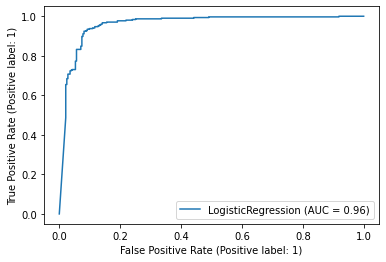

In [19]:
print("ROC curve: ")
RocCurveDisplay.from_estimator(lr,testdata,testtarget)

## NaiveBayes

In [20]:
gnb = GaussianNB()
gnb.fit(traindata, traintarget)
pred = gnb.predict(testdata)
print("Gaussian NB results: ")
print("Accuracy score: ",accuracy_score(testtarget,pred))



Gaussian NB results: 
Accuracy score:  0.7546848381601363


### Confusion Matrix

In [21]:
print("Confusion matrix: ")
print(confusion_matrix(testtarget,pred))

Confusion matrix: 
[[249  34]
 [110 194]]


### ROC Curve

ROC curve: 


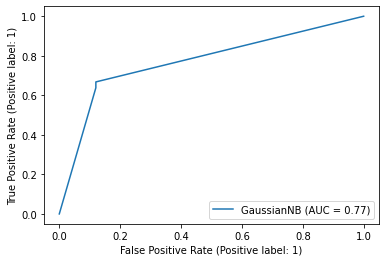

In [22]:
print("ROC curve: ")
RocCurveDisplay.from_estimator(gnb,testdata,testtarget)

## K-Neighbours Classifier

In [23]:

knn = KNeighborsClassifier()
knn.fit(traindata, traintarget)
pred = knn.predict(testdata)
print("K neighbours results: ")
print("Accuracy score: ",accuracy_score(testtarget,pred))



K neighbours results: 
Accuracy score:  0.8943781942078365


### Confusion Matrix

In [24]:
print("Confusion matrix: ")
print(confusion_matrix(testtarget,pred))

Confusion matrix: 
[[229  54]
 [  8 296]]


### ROC Curve

ROC curve: 


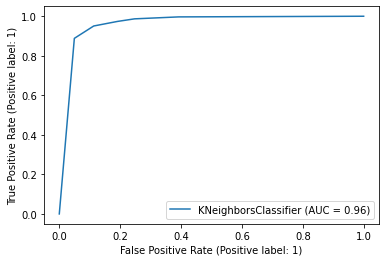

In [25]:
print("ROC curve: ")
RocCurveDisplay.from_estimator(knn,testdata,testtarget)

## Random Forest Classifier

In [26]:
#Random Forest Classifier

rfc = RandomForestClassifier()
rfc.fit(traindata, traintarget)
pred = rfc.predict(testdata)
print("RandomForest results: ")
print("Accuracy score: ",accuracy_score(testtarget,pred))

RandomForest results: 
Accuracy score:  0.9471890971039182


### Confusion Matirx

In [27]:
print("Confusion matrix: ")
print(confusion_matrix(testtarget,pred))

Confusion matrix: 
[[256  27]
 [  4 300]]


### ROC Curve

ROC curve: 


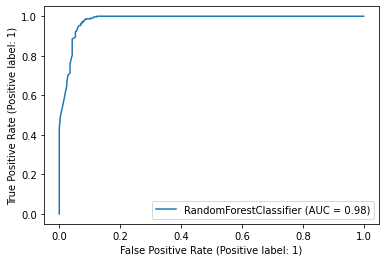

In [28]:
print("ROC curve: ")
RocCurveDisplay.from_estimator(rfc,testdata,testtarget)

#### Q2) Apply necessary pre-processing techniques and identify other possible enhancement methods to increase the accuracy of your classifier. Strike a neat comparison with the accuracy results obtained earlier.


### Sobel Operator for edge detection

The Sobel filter is used for edge detection. It works by calculating the gradient of image intensity at each pixel within the image. It finds the direction of the largest increase from light to dark and the rate of change in that direction.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Sobel Operator')

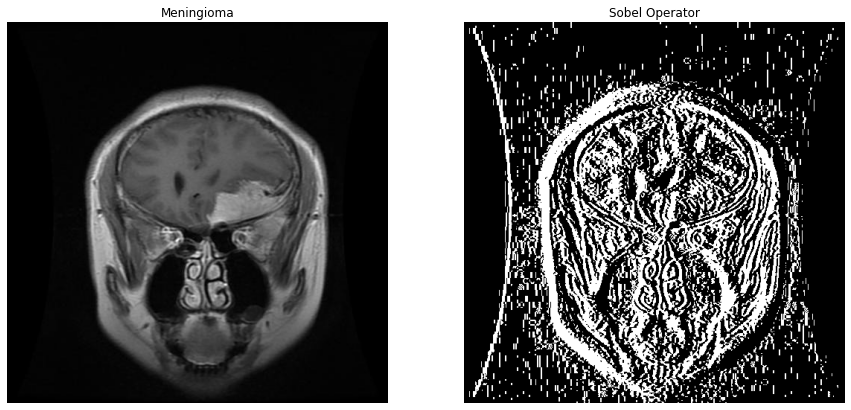

In [29]:
import matplotlib.pyplot as plt
from skimage.filters import gaussian

img = cv2.imread("/content/drive/MyDrive/Brain_Tumor/Training/meningioma/Tr-meTr_0000.jpg")
# imggsn = gaussian(img,sigma=0.9)
sobelx_3 = cv2.Sobel(src=img, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=1)


fig = plt.figure(figsize=(15,15))

fig.add_subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.title('Meningioma')

fig.add_subplot(1,2,2)
plt.imshow(sobelx_3,cmap='gray')
plt.axis('off')
plt.title('Sobel Operator')

### Preprocessing all Images

In [30]:
classpaths = ['/content/drive/MyDrive/Brain_Tumor/Training/meningioma','/content/drive/MyDrive/Brain_Tumor/Training/notumor']
data = []
target = []
d = {'meningioma':0, 'notumor':1,}

for classpath in classpaths:
  c = classpath.split('/')[-1]
  print("starting "+c)
  imgnames = os.listdir(classpath)
  for imgname in imgnames:
    imgpath = os.path.join(classpath,imgname)
    img = cv2.imread(imgpath)
    img = cv2.resize(img,(100,100))
    #imggsn = gaussian(img,sigma=0.9)
    sobelx_3 = cv2.Sobel(src=img, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=1)
    img = np.array(sobelx_3)
    data.append(img)
    target.append(d[c])
  print(c+" done")



starting meningioma
meningioma done
starting notumor
notumor done


### Train Test Split

In [31]:
data2 = [0 for i in range(len(data))]
for i,d in enumerate(data):
  data2[i] = np.ravel(d)
data = np.array(data2)
target = np.array(target)

traindata, testdata, traintarget, testtarget = train_test_split(data,target,test_size=0.2)


print(traindata.shape)
print(traintarget.shape)
print(testdata.shape)
print(testtarget.shape)

(2347, 30000)
(2347,)
(587, 30000)
(587,)


## Logistic Regression

Logistic Regression results: 
Accuracy score:  0.9063032367972743
Confusion matrix: 
[[253  32]
 [ 23 279]]
ROC curve: 


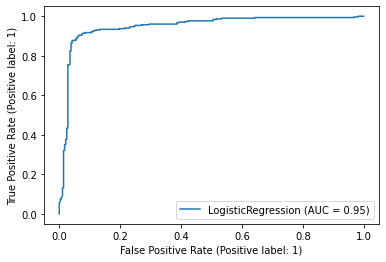

In [32]:


lr = LogisticRegression()
lr.fit(traindata, traintarget)
pred = lr.predict(testdata)
print("Logistic Regression results: ")
print("Accuracy score: ",accuracy_score(testtarget,pred))
print("Confusion matrix: ")
print(confusion_matrix(testtarget,pred))
print("ROC curve: ")
RocCurveDisplay.from_estimator(lr,testdata,testtarget)

## Naive Bayes

Gaussian NB results: 
Accuracy score:  0.8330494037478705
Confusion matrix: 
[[258  27]
 [ 71 231]]
ROC curve: 


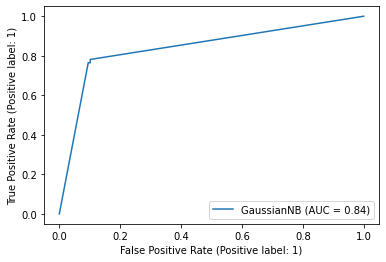

In [33]:


gnb = GaussianNB()
gnb.fit(traindata, traintarget)
pred = gnb.predict(testdata)
print("Gaussian NB results: ")
print("Accuracy score: ",accuracy_score(testtarget,pred))
print("Confusion matrix: ")
print(confusion_matrix(testtarget,pred))
print("ROC curve: ")
RocCurveDisplay.from_estimator(gnb,testdata,testtarget)

## K Neighbours Classifier

K neighbours results: 
Accuracy score:  0.8313458262350937
Confusion matrix: 
[[230  55]
 [ 44 258]]
ROC curve: 


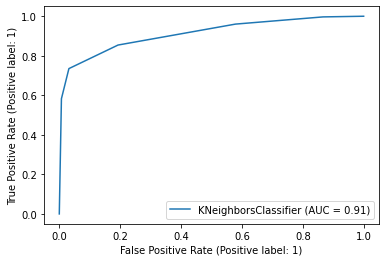

In [34]:

knn = KNeighborsClassifier()
knn.fit(traindata, traintarget)
pred = knn.predict(testdata)
print("K neighbours results: ")
print("Accuracy score: ",accuracy_score(testtarget,pred))
print("Confusion matrix: ")
print(confusion_matrix(testtarget,pred))
print("ROC curve: ")
RocCurveDisplay.from_estimator(knn,testdata,testtarget)

## Random Forest Classifier

RandomForest results: 
Accuracy score:  0.9420783645655877
Confusion matrix: 
[[260  25]
 [  9 293]]
ROC curve: 


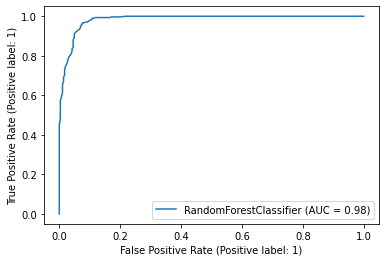

In [35]:
rfc = RandomForestClassifier()
rfc.fit(traindata, traintarget)
pred = rfc.predict(testdata)
print("RandomForest results: ")
print("Accuracy score: ",accuracy_score(testtarget,pred))
print("Confusion matrix: ")
print(confusion_matrix(testtarget,pred))
print("ROC curve: ")
RocCurveDisplay.from_estimator(rfc,testdata,testtarget)

## Results

In [12]:


print("\t\t\tAccuracy before preprocessing\t\t\tAccuracy after preprocessing")
print("Logistic Regression\t91.1%\t\t\t\t\t\t90.63%")
print("Naive bayes\t\t75.4%\t\t\t\t\t\t83.3%")
print("K nearest Neighbour\t89.4%\t\t\t\t\t\t83.1%")
print("Random Forest\t\t94.7%\t\t\t\t\t\t94.2%")


			Accuracy before preprocessing			Accuracy after preprocessing
Logistic Regression	91.1%						90.63%
Naive bayes		75.4%						83.3%
K nearest Neighbour	89.4%						83.1%
Random Forest		94.7%						94.2%


## Conclusion

### From the results above we can conclude that the accuracy has improved for Naive Bayes classifier after preprocessing (applying sobel edge detection), whereas the accuracy has in fact reduced for the rest of the classifiers. Hence it is evident from these results that every model requires a different approach in preprocessing best suited for that model. 